Vamos a utilizar Yolov8 para detectar personas que llevan o no mascarilla. Este es le dataset:

https://www.kaggle.com/datasets/andrewmvd/face-mask-detection

El conjunto de datos contiene 853 imágenes y sus correspondientes archivos de anotaciones, que indican si una persona está usando una máscara correctamente, incorrectamente o no la está usando.

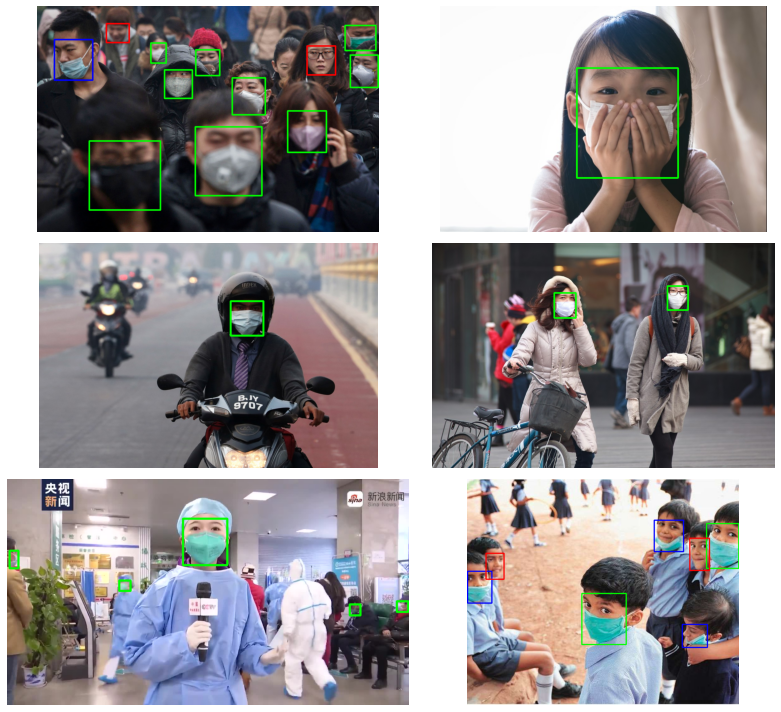

Para entrenar el modelo, un paso necesario será cambiar el formato de los archivos de anotación .xml para que se ajusten al formato [darknet](https://github.com/AlexeyAB/Yolo_mark/issues/60#issuecomment-401854885) que utiliza Yolo. Cada imagen debe tener un archivo .txt asociado, con filas con el formato:

\<clase-objeto> \<x> \<y> \<ancho> \<alto>

Cada línea representará la anotación de cada objeto en la imagen, donde \<x> \<y> son las coordenadas del centro del cuadro delimitador entre 0 y 1, y \<ancho> \<alto> el ancho y el alto respectivos.

Por ejemplo, un img1.jpg debe tener un img1.txt asociado que contenga:



```
1 0.427234 0.123172 0.191749 0.171239
0 0.183523 0.431238 0.241231 0.174121
1 0.542341 0.321253 0.191289 0.219217
```



**PREGUNTA**

1. Convierte las etiquetas en formato XML (Pascal VOC) al formato Darknet de Yolo.
Puedes utilizar el archivo de python convert_to_yolo.py: https://drive.google.com/file/d/11CmDyEtRPJkaRa7KFdQkhYeee2GyDWMj/view?usp=sharing

> Para hacer la conversion, junta las imágenes y las etiquetas en un mismo directorio llamado "images" y pon el fichero convert_to_yolo.py en el directorio padre.



2. Una vez las tengas convertidas, crea la estructura de directorios:

```
/masks:
  /images     
  /labels
```
comprímelo como masks.zip, súbelo a tu Google Drive y podrás descargarlo en tu Colab con:

```
!pip install --upgrade --no-cache-dir gdown
## Pare evitar un error de permiso
!gdown --id <tu id de archivo>
```

In [1]:
!pip install --upgrade --no-cache-dir gdown
## Pare evitar un error de permiso
!gdown --id <tu id de archivo>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `gdown --id <tu id de archivo>'


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**PREGUNTA**
3. Descomprime masks.zip y haz una división en carpetas train, val y test con


```
!pip install split-folders
import splitfolders
splitfolders.ratio('masks', output="masks2", seed=1337, ratio=(.8, 0.1,0.1))
```




In [3]:
import zipfile
import os

zip_file = '/content/drive/MyDrive/masks.zip'
output_dir = '/content/masks/'

# Descomprimir
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print("Archivos descomprimidos en:", output_dir)
print("Contenido del directorio:")
for item in os.listdir(output_dir):
    print(item)


Archivos descomprimidos en: /content/masks/
Contenido del directorio:
masks


In [4]:
!pip install split-folders
import splitfolders
splitfolders.ratio('masks/masks', output="masks2", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 1706 files [00:01, 1279.09 files/s]


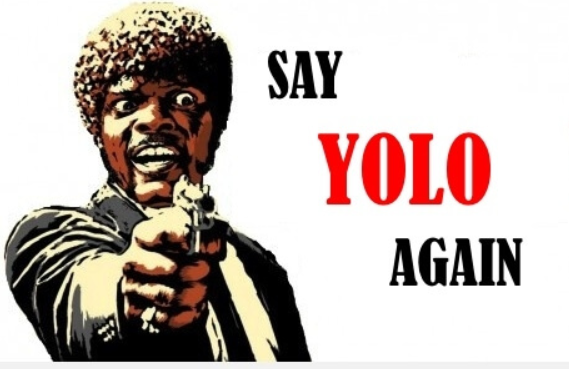

**PREGUNTA**
4. Instala la librería de Yolo

In [5]:
!pip install ultralytics  # installs Yolo V8

import torch

from IPython.display import Image, clear_output
clear_output()


**PREGUNTA**

5. Entrena el modelo yolov8s con batch 10, 20 épocas y custom.yaml que tendrás que crear con los directorios de masks



In [ ]:
'''
Custom.yaml
path: /content/masks2
test: /content/masks2/test/images  # dataset root dir
train: /content/masks2/train/images  # train images (relative to 'path')
val: /content/masks2/val/images     # images (relative to 'path')

# Classes
nc: 3  # number of classes
names: ['No usa mascarilla','Uso Correcto','Uso Incorrecto']
'''

In [6]:
from ultralytics import YOLO

!yolo task=detect mode=train model=yolov8s.pt batch=10 data=custom.yaml epochs=20

100% 21.5M/21.5M [00:00<00:00, 250MB/s]
Ultralytics YOLOv8.2.9 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=custom.yaml, epochs=20, time=None, patience=100, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

**PREGUNTA**

6. Realiza una inferencia con people-mask2.mp4 que puedes descargar con

```
!gdown --id 11JPVBJ4D2YP0eap95_BIGLsHPx1CLT5k
``



In [7]:
!gdown --id 11JPVBJ4D2YP0eap95_BIGLsHPx1CLT5k

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11JPVBJ4D2YP0eap95_BIGLsHPx1CLT5k
To: /content/people-mask2.mp4
100% 72.4M/72.4M [00:02<00:00, 27.7MB/s]


In [9]:
!yolo detect predict model=/content/runs/detect/train/weights/best.pt source=people-mask2.mp4 conf=0.25 imgsz=640

Ultralytics YOLOv8.2.9 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/481) /content/people-mask2.mp4: 384x640 4 No usa mascarillas, 5 Uso Correctos, 1 Uso Incorrecto, 91.8ms
video 1/1 (frame 2/481) /content/people-mask2.mp4: 384x640 4 No usa mascarillas, 4 Uso Correctos, 1 Uso Incorrecto, 13.1ms
video 1/1 (frame 3/481) /content/people-mask2.mp4: 384x640 5 No usa mascarillas, 4 Uso Correctos, 1 Uso Incorrecto, 23.0ms
video 1/1 (frame 4/481) /content/people-mask2.mp4: 384x640 4 No usa mascarillas, 4 Uso Correctos, 1 Uso Incorrecto, 11.2ms
video 1/1 (frame 5/481) /content/people-mask2.mp4: 384x640 4 No usa mascarillas, 4 Uso Correctos, 1 Uso Incorrecto, 10.8ms
video 1/1 (frame 6/481) /content/people-mask2.mp4: 384x640 3 No usa mascarillas, 4 Uso Correctos, 1 Uso Incorrecto, 11.8ms
video 1/1 (frame 7/481) /content/people-mask2.mp4: 384x640 4 No usa mascarillas, 4 Uso Correct

**PREGUNTA**
7. Realiza inferencia creando un modelo desde código con el fichero best.pt que has generado en el entrenamiento anterior.
Puededs hacer una prueba con la imagen: /content/masks2/test/images/maksssksksss109.png


0: 640x640 1 Uso Correcto, 16.3ms
Speed: 2.5ms preprocess, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'No usa mascarilla', 1: 'Uso Correcto', 2: 'Uso Incorrecto'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 254],
        [255, 254, 254],
        [255, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 254, 254],
        [255, 254, 254],
        [255, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 254, 254],
        [255, 254, 254],
        [255, 254, 254]],

       ...,

       [[255, 255, 254],
        [255, 255, 254],
        [255, 255, 254],
        ...,
      

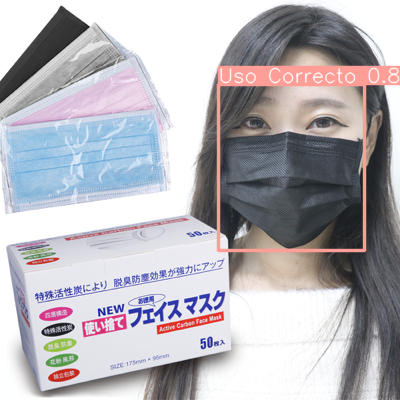

In [11]:
from PIL import Image

model = YOLO("/content/runs/detect/train/weights/best.pt", task="detect")
image_path = "/content/masks2/test/images/maksssksksss109.png"
# Mostrar la imagen con las detecciones
image = Image.open(image_path)
results = model.predict(source=image, save=True, imgsz=640, conf=0.25)
print(results)
display(Image.open('runs/detect/predict3/maksssksksss109.png'))
